In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import r_regression

from data_utilities import get_raw_data, get_clean_data


train, test = get_raw_data()

Loading raw dataset


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62699 entries, 0 to 62698
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   driver_birth_date                         62699 non-null  datetime64[ns]
 1   driver_driving_license_ym                 62699 non-null  object        
 2   driver_other_vehicles                     32891 non-null  object        
 3   driver_insured_years                      55568 non-null  object        
 4   occasional_driver_birth_date              17498 non-null  datetime64[ns]
 5   occasional_driver_license_attainment_age  17498 non-null  float64       
 6   policyholder_age                          4116 non-null   float64       
 7   policyholder_license_attainment_age       4116 non-null   float64       
 8   vehicle_acquisition_state                 62699 non-null  object        
 9   vehicle_buy_ym              

In [3]:
train.describe()

,occasional_driver_license_attainment_age,policyholder_age,policyholder_license_attainment_age,vehicle_engine_power,vehicle_number_of_doors,driver_claims_last_1_year,driver_claims_from_year_1_to_2,driver_claims_from_year_2_to_3,driver_claims_from_year_3_to_4,driver_claims_from_year_4_to_5,competitor_lowest_price,number_of_competitors
count,17498.000000,4116.000000,4116.000000,62699.000000,62699.000000,62699.000000,62699.000000,62699.000000,62699.000000,62699.000000,62699.000000,62699.000000
mean,22.831238,47.120262,21.648445,120.642690,4.613327,0.020016,0.011723,0.011707,0.005790,0.004003,247.628708,9.646884
std,7.578515,12.878472,6.166272,42.753791,0.768983,0.144981,0.113126,0.112634,0.080757,0.066587,86.765620,3.083937
min,18.000000,18.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.150000,3.000000
25%,18.000000,38.000000,18.000000,90.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.380000,7.000000
50%,20.000000,46.000000,19.000000,112.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,219.510000,10.000000
75%,24.000000,56.000000,22.000000,140.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,295.105000,12.000000
max,76.000000,94.000000,80.000000,507.000000,6.000000,3.000000,3.000000,3.000000,4.000000,3.000000,499.970000,19.000000


In [4]:
train.head()

,driver_birth_date,driver_driving_license_ym,driver_other_vehicles,driver_insured_years,occasional_driver_birth_date,occasional_driver_license_attainment_age,policyholder_age,policyholder_license_attainment_age,vehicle_acquisition_state,vehicle_buy_ym,...,vehicle_use,driver_claims_last_1_year,driver_claims_from_year_1_to_2,driver_claims_from_year_2_to_3,driver_claims_from_year_3_to_4,driver_claims_from_year_4_to_5,timestamp,competitor_lowest_price,number_of_competitors,quote_id
0,1950-05-12,1969-04,NaN,MORE_THAN_TEN,NaT,NaN,NaN,NaN,OWNED,2006-03,...,HABITUAL,0,0,0,0,0,2023-05-01 00:04:22,196.26,10,51d5ba7e8044c72ff5f981b46c09ae37ba55551c50f4ac...
1,1986-08-09,2011-05,BIKE,ONE,NaT,NaN,NaN,NaN,OWNED,2020-06,...,HABITUAL,0,0,0,0,0,2023-05-01 00:08:44,220.20,9,cae1d02522b96ef3ed7f9785ee283da7888b84692b56b4...
2,1988-03-24,2006-03,NaN,FOUR,1986-04-20,18.0,NaN,NaN,RECENT_SECOND_HAND_FROM_PRIVATE,2023-05,...,OCCASIONAL,0,0,0,0,0,2023-05-01 00:17:10,234.11,9,6215cd4d59e461c525685278a8c7b7ed0d2650693e1eef...
3,1972-07-20,1994-07,CAR,SIX,1967-01-27,18.0,NaN,NaN,OWNED,2022-05,...,OCCASIONAL,0,0,0,0,0,2023-05-01 00:19:47,145.98,14,f072220d72571df3560f77c74d7f691c73ae913095a3c2...
4,1975-02-16,2007-04,NaN,ONE,NaT,NaN,NaN,NaN,OWNED,2017-07,...,HABITUAL,1,0,0,0,0,2023-05-01 00:23:57,245.90,9,daecd73a0c6ce56303f2f117b4c9d5f2b788fef68f7234...


In [5]:
set(train["driver_insured_years"]), set(train["vehicle_use"])

({'EIGHT',
  'FIVE',
  'FOUR',
  'MORE_THAN_TEN',
  'NINE',
  'ONE',
  'SEVEN',
  'SIX',
  'TEN',
  'THREE',
  'TWO',
  nan},
 {'HABITUAL',
  'OCCASIONAL',
  'PROFESSIONAL_HABITUAL',
  'PROFESSIONAL_OCCASIONAL'})

In [6]:
set(train["driver_other_vehicles"]), set(train["vehicle_acquisition_state"])

({'BIKE', 'CAR', 'OTHER', nan},
 {'BUYING_FIRST_HAND',
  'BUYING_SECOND_HAND_FROM_CAR_DEALER',
  'BUYING_SECOND_HAND_FROM_PRIVATE',
  'OWNED',
  'RECENT_FIRST_HAND',
  'RECENT_SECOND_HAND_FROM_CAR_DEALER',
  'RECENT_SECOND_HAND_FROM_PRIVATE'})

In [7]:
[c for c in train.columns if c not in test.columns]

['competitor_lowest_price', 'number_of_competitors']

In [8]:
train.isnull().sum(0)

driver_birth_date                               0
driver_driving_license_ym                       0
driver_other_vehicles                       29808
driver_insured_years                         7131
occasional_driver_birth_date                45201
occasional_driver_license_attainment_age    45201
policyholder_age                            58583
policyholder_license_attainment_age         58583
vehicle_acquisition_state                       0
vehicle_buy_ym                                  0
vehicle_registration_ym                         0
vehicle_engine_power                            0
vehicle_number_of_doors                         0
vehicle_use                                     0
driver_claims_last_1_year                       0
driver_claims_from_year_1_to_2                  0
driver_claims_from_year_2_to_3                  0
driver_claims_from_year_3_to_4                  0
driver_claims_from_year_4_to_5                  0
timestamp                                       0


In [9]:
test.isnull().sum(0)

driver_birth_date                               0
driver_driving_license_ym                       0
driver_other_vehicles                        8040
driver_insured_years                         2177
occasional_driver_birth_date                12387
occasional_driver_license_attainment_age    12387
policyholder_age                            15965
policyholder_license_attainment_age         15965
vehicle_acquisition_state                       0
vehicle_buy_ym                                  0
vehicle_registration_ym                         0
vehicle_engine_power                            0
vehicle_number_of_doors                         0
vehicle_use                                     0
driver_claims_last_1_year                       0
driver_claims_from_year_1_to_2                  0
driver_claims_from_year_2_to_3                  0
driver_claims_from_year_3_to_4                  0
driver_claims_from_year_4_to_5                  0
timestamp                                       0


In [10]:
train["competitor_lowest_price"].describe()

count    62699.000000
mean       247.628708
std         86.765620
min        132.150000
25%        179.380000
50%        219.510000
75%        295.105000
max        499.970000
Name: competitor_lowest_price, dtype: float64

/Users/eduard/code/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


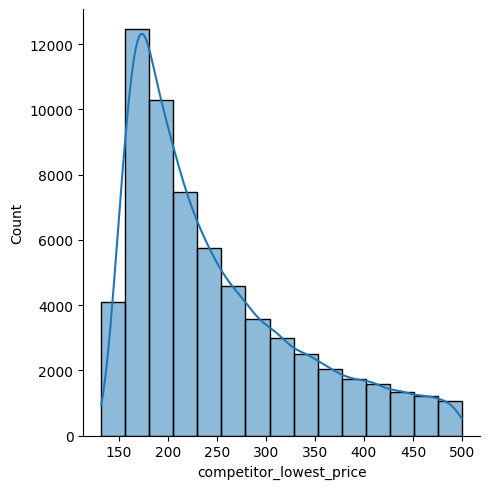

In [11]:
sns.displot(train["competitor_lowest_price"], kde=True, bins=15)

/Users/eduard/code/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


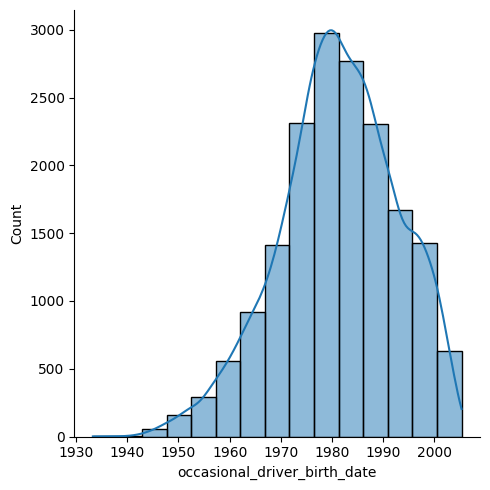

In [12]:
sns.displot(train["occasional_driver_birth_date"], kde=True, bins=15)

In [18]:
X_train, y_train, X_test = get_clean_data(remove_all_nulls=True)

s = pd.Series(r_regression(X_train, y_train), index=X_train.columns)
s.sort_values(ascending=False)[:16]

driver_insured_years#ZERO                                       0.402079
driver_driving_license_ym                                       0.252268
vehicle_acquisition_state#RECENT_SECOND_HAND_FROM_PRIVATE       0.220777
vehicle_buy_ym                                                  0.199036
driver_birth_date                                               0.190981
occasional_driver_birth_date#7.0                                0.184355
vehicle_acquisition_state#RECENT_SECOND_HAND_FROM_CAR_DEALER    0.133072
driver_insured_years#ONE                                        0.108898
driver_claims_last_1_year                                       0.087547
driver_claims_from_year_1_to_2                                  0.068552
vehicle_use#PROFESSIONAL_HABITUAL                               0.063852
policyholder_age#0.0                                            0.059187
driver_claims_from_year_2_to_3                                  0.055367
vehicle_engine_power                               

In [19]:
s.sort_values(ascending=True)[:16]

vehicle_acquisition_state#OWNED                -0.230593
driver_insured_years#MORE_THAN_TEN             -0.159808
driver_insured_years#FIVE                      -0.115714
vehicle_registration_ym                        -0.100971
occasional_driver_birth_date#4.0               -0.092681
driver_insured_years#SIX                       -0.077558
occasional_driver_birth_date#5.0               -0.074299
driver_insured_years#FOUR                      -0.072158
driver_insured_years#SEVEN                     -0.070323
driver_insured_years#EIGHT                     -0.062633
driver_insured_years#TEN                       -0.062083
occasional_driver_birth_date#3.0               -0.058811
occasional_driver_license_attainment_age#0.0   -0.055499
policyholder_license_attainment_age#nan        -0.054546
policyholder_age#nan                           -0.054546
driver_insured_years#THREE                     -0.052408
dtype: float64